<a href="https://colab.research.google.com/github/2020-nlp-c/nlp-statisticsmodel/blob/master/jjc/luhnsum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Luhn Summarization

In [1]:
doc = '''
코로나19 대응 의료 인공지능 컨소시엄 출범 산학연병 인공지능 전문가 20여 명으로 구성, 기술‧응용 공동 연구
지난 8일, 창립준비 모임…미영상의학회 COVID-19 컨소시엄과도 협력

코로나19 바이러스의 세계적 감염 유행에 효과적으로 대응하기 위해 관련 전문가들이 모인 ‘코로나19 감염 대응을 위한 의료 인공지능 컨소시엄’이 9월 1일에 출범한다. 

연세대 의대, 한국전자통신원, 네이버 등 산학연병 20여 명이 참여하는 컨소시엄에서는 인공지능 기술과 응용 분야를 공동으로 연구하고 개발, 검증할 예정이다. 또 이 인공지능 기술을 적용하기 위해 필요한 데이터를 수집, 공유, 활용한다. 나아가 다양한 산학연병 전문가들이 국내외적으로 협력하고 공동으로 대응해 나갈 예정이다.
 
컨소시엄에는 15개 기관의 20여 명 전문가들이 참여했다. 연세대 의과대학에서는 박유랑(의생명시스템정보학), 김휘영(방사선의과학연구소), 심규원(신경외과), 염준섭(감염내과), 최병욱(영상의학과, 사진), 허진(영상의학과) 교수가 참여했다.

대학군에서는 권인호(동아대), 김남국(울산대), 김윤현(전남대), 김진영(계명대), 박상준(서울대), 신수용(성균관대), 정명진(성균관대), 진광남(서울대), 홍헬렌(서울여대) 교수가 , 산업군에서는 김기환(루닛), 이동훈(카카오), 정규환(뷰노), 최우식(딥노이드), 최정필(코어라인소프트), 하정우(네이버)가 기업을 대표해 동참했다.

이 밖에도 전종홍(한국전자통신연구원), 김경훈(정보통신정책연구원), 예종철(한국과학기술원) 교수도 포함됐다.
 
인공지능 컨소시엄은 지난 7월 8일에 창립 준비 위원 모임을 했고, 연세대 의대 영상의학과 최병욱 교수(사진)가 준비위원장으로 선출됐다.

컨소시엄은 북미영상의학회에서 시작한 COVID-19 RICORD 컨소시엄, 유럽연합에서 시작한 COVID-19 이미징 AI 이니셔티브 등과 함께 국제 협력 활동을 펼칠 계획이며, 코로나19 대응을 위한 AI 핵심표준 개발도 목표로 하고 있다. 아울러 대한의료인공지능학회, 대한영상의학회 등 국내 관련 학회와도 적극 협력할 계획이다.
 
한편 오는 7월 24일(금)에는 온라인 워크숍을 개최해 코로나 19 감염대응 의료 인공지능 관련 동향발표 및 연구개발 사례 소개가 있을 예정이다.
'''

In [152]:
ppdoc = doc.split('\n')
sents = []
for p in ppdoc:
    if p == '':
        continue
    sents.extend(p.split('.'))

sents

In [154]:
ppdoc

13

In [24]:
sents[4]

'연세대 의대, 한국전자통신원, 네이버 등 산학연병 20여 명이 참여하는 컨소시엄에서는 인공지능 기술과 응용 분야를 공동으로 연구하고 개발, 검증할 예정이다'

In [28]:
f_sents = []
for s in sents:
    if s == '' or s == ' ':
        continue
    f_sents.append(s.strip())
f_sents

['코로나19 대응 의료 인공지능 컨소시엄 출범 산학연병 인공지능 전문가 20여 명으로 구성, 기술‧응용 공동 연구',
 '지난 8일, 창립준비 모임…미영상의학회 COVID-19 컨소시엄과도 협력',
 '코로나19 바이러스의 세계적 감염 유행에 효과적으로 대응하기 위해 관련 전문가들이 모인 ‘코로나19 감염 대응을 위한 의료 인공지능 컨소시엄’이 9월 1일에 출범한다',
 '연세대 의대, 한국전자통신원, 네이버 등 산학연병 20여 명이 참여하는 컨소시엄에서는 인공지능 기술과 응용 분야를 공동으로 연구하고 개발, 검증할 예정이다',
 '또 이 인공지능 기술을 적용하기 위해 필요한 데이터를 수집, 공유, 활용한다',
 '나아가 다양한 산학연병 전문가들이 국내외적으로 협력하고 공동으로 대응해 나갈 예정이다',
 '컨소시엄에는 15개 기관의 20여 명 전문가들이 참여했다',
 '연세대 의과대학에서는 박유랑(의생명시스템정보학), 김휘영(방사선의과학연구소), 심규원(신경외과), 염준섭(감염내과), 최병욱(영상의학과, 사진), 허진(영상의학과) 교수가 참여했다',
 '대학군에서는 권인호(동아대), 김남국(울산대), 김윤현(전남대), 김진영(계명대), 박상준(서울대), 신수용(성균관대), 정명진(성균관대), 진광남(서울대), 홍헬렌(서울여대) 교수가 , 산업군에서는 김기환(루닛), 이동훈(카카오), 정규환(뷰노), 최우식(딥노이드), 최정필(코어라인소프트), 하정우(네이버)가 기업을 대표해 동참했다',
 '이 밖에도 전종홍(한국전자통신연구원), 김경훈(정보통신정책연구원), 예종철(한국과학기술원) 교수도 포함됐다',
 '인공지능 컨소시엄은 지난 7월 8일에 창립 준비 위원 모임을 했고, 연세대 의대 영상의학과 최병욱 교수(사진)가 준비위원장으로 선출됐다',
 '컨소시엄은 북미영상의학회에서 시작한 COVID-19 RICORD 컨소시엄, 유럽연합에서 시작한 COVID-19 이미징 AI 이니셔티브 등과 함께 국제 협력 활동을 펼칠 계획이며, 코로나19 대응을 위한 AI 핵심표준 개

In [155]:
len(f_sents)

14

In [41]:
words = doc.split()
print(len(words))
words.pop(words.index(','))
print(words)
print(len(set(words)))

205
['코로나19', '대응', '의료', '인공지능', '컨소시엄', '출범', '산학연병', '인공지능', '전문가', '20여', '명으로', '구성,', '기술‧응용', '공동', '연구', '지난', '8일,', '창립준비', '모임…미영상의학회', 'COVID-19', '컨소시엄과도', '협력', '코로나19', '바이러스의', '세계적', '감염', '유행에', '효과적으로', '대응하기', '위해', '관련', '전문가들이', '모인', '‘코로나19', '감염', '대응을', '위한', '의료', '인공지능', '컨소시엄’이', '9월', '1일에', '출범한다.', '연세대', '의대,', '한국전자통신원,', '네이버', '등', '산학연병', '20여', '명이', '참여하는', '컨소시엄에서는', '인공지능', '기술과', '응용', '분야를', '공동으로', '연구하고', '개발,', '검증할', '예정이다.', '또', '이', '인공지능', '기술을', '적용하기', '위해', '필요한', '데이터를', '수집,', '공유,', '활용한다.', '나아가', '다양한', '산학연병', '전문가들이', '국내외적으로', '협력하고', '공동으로', '대응해', '나갈', '예정이다.', '컨소시엄에는', '15개', '기관의', '20여', '명', '전문가들이', '참여했다.', '연세대', '의과대학에서는', '박유랑(의생명시스템정보학),', '김휘영(방사선의과학연구소),', '심규원(신경외과),', '염준섭(감염내과),', '최병욱(영상의학과,', '사진),', '허진(영상의학과)', '교수가', '참여했다.', '대학군에서는', '권인호(동아대),', '김남국(울산대),', '김윤현(전남대),', '김진영(계명대),', '박상준(서울대),', '신수용(성균관대),', '정명진(성균관대),', '진광남(서울대),', '홍헬렌(서울여대)', '교수가', '산업군에서는', '김기환(루닛),', '이동훈(카카오),', '정규환(뷰노

In [44]:
pip install konlpy

     |████████████████████████████████| 19.4MB 39.5MB/s 
     |████████████████████████████████| 3.8MB 42.7MB/s 
     |████████████████████████████████| 92kB 10.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [47]:
from konlpy.tag import Okt
okt = Okt()

word_dic = okt.nouns(doc)

In [68]:
len(set(word_dic))

156

In [63]:
len(word_dic)

255

In [49]:
# 중요단어 확인
words = doc.split()
counts = []
for word in word_dic:
    counts.append(doc.count(word))

In [53]:
import numpy as np

In [77]:
word_total = []
for i in range(len(counts)):
    imp  = counts[i] / np.asarray(counts).sum()
    word_total.append(imp)

In [85]:
word_total.sort(reverse=True)

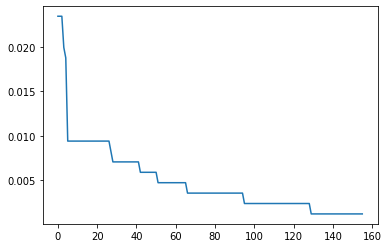

In [96]:
plt.plot(word_total) # 데이터 확인 C, D 결정

In [97]:
# C = 0.01, D = 0.005
word_imp = {}
for i in range(len(counts)):
    imp  = counts[i] / np.asarray(counts).sum()
    if imp >= 0.005 and imp <= 0.01:
        word_imp[word_dic[i]] = imp

In [98]:
# 중요단어 개수
len(word_imp)

46

In [121]:
# word_imp

In [124]:
# 문장 중요도 : 중요단어 개수**2 / window size (문장 내 중요단어 시작, 끝)

# 문장 중요도 확인 1번 방법

sents_imp = []
for s in f_sents:
    temp = okt.nouns(s)
    s_index = len(temp)-1
    f_index = 0
    imp_count = 0
    for word in word_imp:
        try:
            now_idx = temp.index(word)
            imp_count += 1
        except:
            continue
        if now_idx < s_index:
            s_index = now_idx
        if now_idx > f_index:
            f_index = now_idx
    win_size = f_index-s_index + 1
    sent_imp = imp_count**2/win_size
    sents_imp.append([s, s_index, f_index, win_size, imp_count, sent_imp])

# sents_imp

In [137]:
# 문장 중요도 확인 2번 방법

sents_imp = []
for s in f_sents:
    temp = s.split()
    s_index = len(temp)-1
    f_index = 0
    imp_count = 0
    
    for t in range(len(temp)):
        for word in word_imp:
            if word in temp[t]:
                imp_count += 1
                if t < s_index:
                    s_index = t
                if t > f_index:
                    f_index = t
                break
        
    win_size = f_index-s_index + 1
    sent_imp = imp_count**2 / win_size
    sents_imp.append([s, s_index, f_index, win_size, imp_count, sent_imp])

# sents_imp

In [147]:
import pandas as pd
sents_df = pd.DataFrame(sents_imp, columns = ['문장', '시작index', '끝 index', 'window_size', '중요단어 카운트', '문장 중요도'])

In [148]:
sents_df[sents_df['문장 중요도'] == sents_df['문장 중요도'].max()]['문장'].values[0]

'컨소시엄은 북미영상의학회에서 시작한 COVID-19 RICORD 컨소시엄, 유럽연합에서 시작한 COVID-19 이미징 AI 이니셔티브 등과 함께 국제 협력 활동을 펼칠 계획이며, 코로나19 대응을 위한 AI 핵심표준 개발도 목표로 하고 있다'

In [151]:
sents_df.sort_values(by='문장 중요도', ascending=False)[['문장', '문장 중요도']]

,문장,문장 중요도
11,"컨소시엄은 북미영상의학회에서 시작한 COVID-19 RICORD 컨소시엄, 유럽연합...",13.884615
12,"아울러 대한의료인공지능학회, 대한영상의학회 등 국내 관련 학회와도 적극 협력할 계획이다",9.000000
13,한편 오는 7월 24일(금)에는 온라인 워크숍을 개최해 코로나 19 감염대응 의료 ...,9.000000
10,"인공지능 컨소시엄은 지난 7월 8일에 창립 준비 위원 모임을 했고, 연세대 의대 영...",8.470588
2,코로나19 바이러스의 세계적 감염 유행에 효과적으로 대응하기 위해 관련 전문가들이 ...,8.000000
0,코로나19 대응 의료 인공지능 컨소시엄 출범 산학연병 인공지능 전문가 20여 명으로...,4.500000
7,"연세대 의과대학에서는 박유랑(의생명시스템정보학), 김휘영(방사선의과학연구소), 심규...",3.600000
1,"지난 8일, 창립준비 모임…미영상의학회 COVID-19 컨소시엄과도 협력",3.200000
5,나아가 다양한 산학연병 전문가들이 국내외적으로 협력하고 공동으로 대응해 나갈 예정이다,2.250000
3,"연세대 의대, 한국전자통신원, 네이버 등 산학연병 20여 명이 참여하는 컨소시엄에서...",2.117647


In [159]:
sents_df.sort_values(by='문장 중요도', ascending=False)['문장'][11]

'컨소시엄은 북미영상의학회에서 시작한 COVID-19 RICORD 컨소시엄, 유럽연합에서 시작한 COVID-19 이미징 AI 이니셔티브 등과 함께 국제 협력 활동을 펼칠 계획이며, 코로나19 대응을 위한 AI 핵심표준 개발도 목표로 하고 있다'

In [ ]:
# Class화